In [63]:
import pandas as pd

In [64]:
data = pd.read_csv('fallraw_63000200.csv')
data

,times,temperature,humidity,winddirection,windpower,rains,rains63000120,waterlevels63000120,rains63000100,waterlevels63000100,waterlevels
0,2020-05-29 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,83.53
1,2020-05-29 01:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,83.53
2,2020-05-29 02:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,83.52
3,2020-05-29 03:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,83.52
4,2020-05-29 04:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,83.52
...,...,...,...,...,...,...,...,...,...,...,...
15916,2022-03-23 04:00:00,6.8,95.6,NE,9.7,0.4,NaN,NaN,NaN,NaN,NaN
15917,2022-03-23 05:00:00,6.8,95.1,NE,9.4,0.1,NaN,NaN,NaN,NaN,NaN
15918,2022-03-23 06:00:00,6.8,95.1,NE,9.4,0.1,NaN,NaN,NaN,NaN,NaN
15919,2022-03-23 07:00:00,6.8,95.1,NE,9.4,0.1,NaN,NaN,NaN,NaN,NaN


In [65]:
data = data.dropna(how="all",axis=1)
data = data.dropna()
data['winddirection'].value_counts()
data

,times,temperature,humidity,winddirection,windpower,rains,waterlevels63000120,rains63000100,waterlevels63000100,waterlevels
6552,2021-02-26 00:00:00,9.0,99.0,E,2.0,0.5,236.07,0.5,199.66,83.39
6553,2021-02-26 01:00:00,9.0,98.0,E,1.0,0.0,236.06,0.0,199.66,83.41
6554,2021-02-26 02:00:00,9.0,98.0,E,2.0,0.0,236.06,0.0,199.65,83.42
6555,2021-02-26 03:00:00,10.0,93.0,E,1.0,0.5,236.06,0.0,199.65,83.43
6556,2021-02-26 04:00:00,9.0,100.0,E,2.0,0.5,236.06,0.0,199.65,83.44
...,...,...,...,...,...,...,...,...,...,...
15762,2022-03-16 18:00:00,26.0,51.0,E,1.0,0.0,235.91,0.0,225.79,83.37
15763,2022-03-16 19:00:00,25.0,60.0,NE,2.0,0.0,235.88,0.0,225.80,83.37
15764,2022-03-16 20:00:00,23.0,69.0,NE,3.0,0.0,235.88,0.0,225.80,83.37
15765,2022-03-16 21:00:00,20.0,64.0,E,2.0,0.0,235.88,0.0,225.80,83.38


In [66]:
# 定义风向到角度的映射
wind_direction_map = {
    'N': 0, 'NE': 45, 'E': 90, 'SE': 135,
    'S': 180, 'SW': 225, 'W': 270, 'NW': 315
}

# 替换风向为角度
data['winddirection'] = pd.to_numeric(data['winddirection'].replace(wind_direction_map), errors='coerce').infer_objects(copy=False)



C:\Users\mengyonghao\AppData\Local\Temp\ipykernel_28984\1679492155.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['winddirection'] = pd.to_numeric(data['winddirection'].replace(wind_direction_map), errors='coerce').infer_objects(copy=False)


In [67]:
# %matplotlib agg
# import matplotlib.pyplot as plt
#
# plt.ion()
# fig, ax = plt.subplots()
# for i in range(len(data.times)-24):
#     ax.clear()
#     plt.plot(data['times'][i:i+24], data.waterlevels63000120[i:i+24])
#     plt.plot(data['times'][i:i+24], data.waterlevels63000100[i:i+24])
#     plt.plot(data['times'][i:i+24], data.waterlevels[i:i+24])
#     ax.legend()
#     plt.draw()
#     plt.pause(0.2)

In [93]:
# for i in range(1,7):
#     data[f'last{i}_120'] = data['rains'].shift(-i)
#     data[f'last{i}_100'] = data['rains63000100'].shift(-i)
# data.waterlevels = data.waterlevels.diff()
from scipy.signal import savgol_filter
import numpy as np
poly_coeff = np.polyfit(range(len(data.times)), data['waterlevels'], deg=10)
poly_fit = np.polyval(poly_coeff,range(len(data.times)))
data_copy = data.copy()
# data_copy['coeff'] = poly_fit
data_copy = data_copy.drop(columns=['times', 'winddirection', 'humidity','temperature','windpower'])
data_copy['waterlevels_smooth'] = np.round(savgol_filter(data['waterlevels'], window_length=24, polyorder=3),2)
data_copy = data_copy.dropna()
data_copy.to_csv('dataset.csv', index=False)
data_copy

,rains,waterlevels63000120,rains63000100,waterlevels63000100,waterlevels,waterlevels_smooth
6552,0.5,236.07,0.5,199.66,83.39,83.39
6553,0.0,236.06,0.0,199.66,83.41,83.40
6554,0.0,236.06,0.0,199.65,83.42,83.42
6555,0.5,236.06,0.0,199.65,83.43,83.43
6556,0.5,236.06,0.0,199.65,83.44,83.45
...,...,...,...,...,...,...
15762,0.0,235.91,0.0,225.79,83.37,83.39
15763,0.0,235.88,0.0,225.80,83.37,83.38
15764,0.0,235.88,0.0,225.80,83.37,83.38
15765,0.0,235.88,0.0,225.80,83.38,83.37


<Axes: >

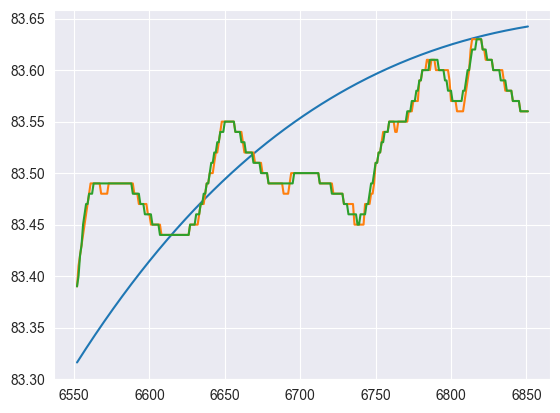

In [92]:
data_copy.coeff.head(300).plot()
data_copy.waterlevels.head(300).plot()
data_copy.waterlevels_smooth.head(300).plot()

In [111]:
no_time_data = data.drop(columns=['times'])

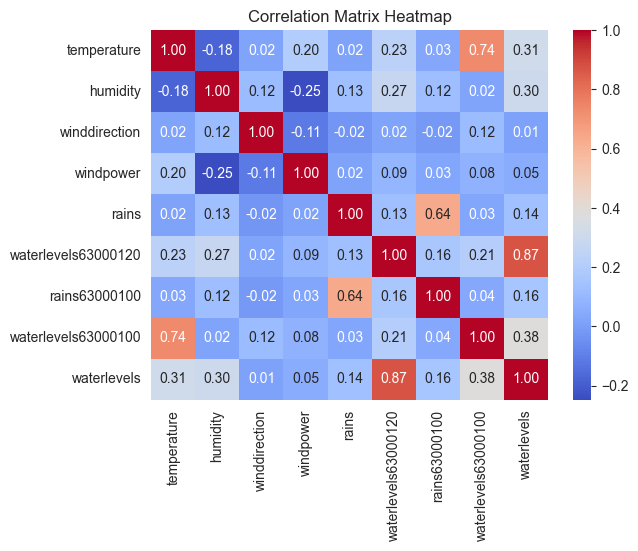

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr_matrix = no_time_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix Heatmap")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import numpy as np
# 定义特征变量和目标变量
data_o = no_time_data.drop(columns=['winddirection'])
data_o - data_o.shift(-1)

,temperature,humidity,windpower,rains,waterlevels63000120,rains63000100,waterlevels63000100,waterlevels
6552,0.0,1.0,1.0,0.5,0.01,0.5,0.00,-0.02
6553,0.0,0.0,-1.0,0.0,0.00,0.0,0.01,-0.01
6554,-1.0,5.0,1.0,-0.5,0.00,0.0,0.00,-0.01
6555,1.0,-7.0,-1.0,0.0,0.00,0.0,0.00,-0.01
6556,0.0,0.0,-1.0,0.5,0.00,0.0,0.01,-0.01
...,...,...,...,...,...,...,...,...
15762,1.0,-9.0,-1.0,0.0,0.03,0.0,-0.01,0.00
15763,2.0,-9.0,-1.0,0.0,0.00,0.0,0.00,0.00
15764,3.0,5.0,1.0,0.0,0.00,0.0,0.00,-0.01
15765,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00


In [37]:
X, y = [],[]
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
data = x_scaler.fit_transform(data_o)
y_scaler.fit_transform(data_o['waterlevels'].values.reshape(-1, 1))
seq_len = 1
for i in range(len(data) - seq_len - 2):
    X.append(data[i:i+seq_len,:-1])  # 10 天特征
    y.append(data[i+seq_len,-1])  # 第 11 天水位
# print(X[0])
# print(y[0])
X, y = np.array(X), np.array(y)
X[:, -1] = np.sqrt(X[:, -1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X.shape, y.shape)
# print(X_train.shape, X_test.shape)

<class 'numpy.ndarray'>
(7,)


np.float64(0.010662395065635618)

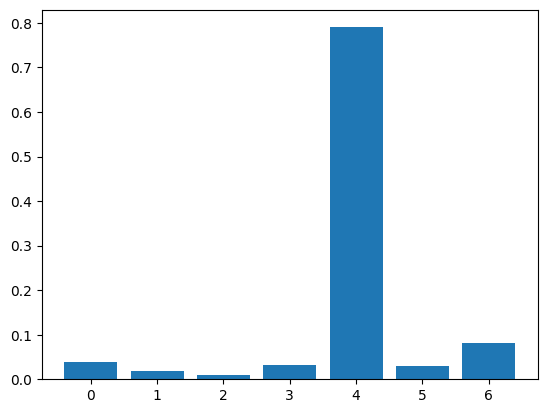

In [39]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
xgb_model = XGBRegressor(n_estimators=100)
# print(X_train.reshape(X_train.shape[0],-1).shape)
print(type(X_train))
xgb_model.fit(X_train.reshape(X_train.shape[0],-1), y_train)
y_pred = xgb_model.predict(X_train.reshape(X_train.shape[0], -1))
importance = xgb_model.feature_importances_
print(importance.shape)
plt.bar(range(importance.shape[0]),importance)
rmse = np.sqrt(mean_squared_error(y_pred, y_train))
rmse

In [291]:
import torch

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [292]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=8, hidden_size=64, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # 预测一个数值

    def forward(self, x):
        # print("Input shape:", x.shape)
        out, _ = self.lstm(x)  # out: (batch_size, seq_len, hidden_size)
        # print("LSTM output shape:", out.shape)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出
        return out

In [293]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [294]:
x_train = torch.tensor(X_train, dtype=torch.float32).to(device)
x_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)
# y_train = y_train.clone().detach().to(torch.float32).to(device)
# y_test = y_test.clone().detach().to(torch.float32).view(-1, 1).to(device)


train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

C:\Users\mengyonghao\AppData\Local\Temp\ipykernel_23188\2003608435.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
C:\Users\mengyonghao\AppData\Local\Temp\ipykernel_23188\2003608435.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.float32).to(device)


In [295]:
epochs = 20
for epoch in range(epochs):
    for x_batch, y_batch in train_dataloader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch.view(-1, 1))
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 1, Loss: 0.0008
Epoch 2, Loss: 0.0007
Epoch 3, Loss: 0.0005
Epoch 4, Loss: 0.0005
Epoch 5, Loss: 0.0006
Epoch 6, Loss: 0.0006
Epoch 7, Loss: 0.0005
Epoch 8, Loss: 0.0005
Epoch 9, Loss: 0.0005
Epoch 10, Loss: 0.0005
Epoch 11, Loss: 0.0005
Epoch 12, Loss: 0.0004
Epoch 13, Loss: 0.0004
Epoch 14, Loss: 0.0003
Epoch 15, Loss: 0.0004
Epoch 16, Loss: 0.0003
Epoch 17, Loss: 0.0003
Epoch 18, Loss: 0.0003
Epoch 19, Loss: 0.0003
Epoch 20, Loss: 0.0002


In [263]:
model.eval()
y_preds = []
y_trues = []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch).squeeze()

        y_preds.extend(y_pred.cpu().numpy())
        y_trues.extend(y_batch.cpu().numpy())
print(y_preds[0])
print(y_trues[0])

0.06643373
0.07048458


In [264]:
y_preds = y_scaler.inverse_transform(np.array(y_preds).reshape(-1, 1))
y_trues = y_scaler.inverse_transform(np.array(y_trues).reshape(-1, 1))
print(y_preds[0])
print(y_trues[0])
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_trues, y_preds))
print(f"测试集 RMSE: {rmse:.4f}")

[83.340805]
[83.350006]
测试集 RMSE: 0.0254


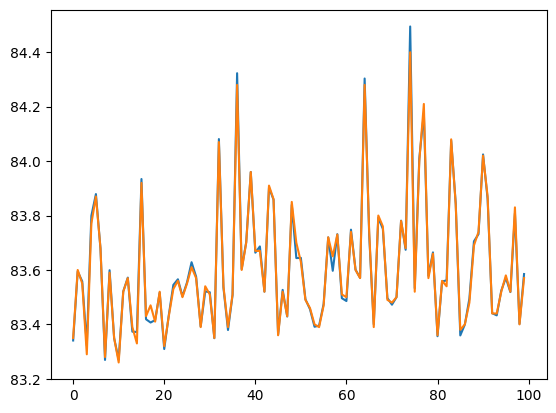

In [266]:
import matplotlib.pyplot as plt
plt.plot(range(100), y_preds[:100])
plt.plot(range(100), y_trues[:100])

In [1]:
import requests

In [4]:

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.0.0 Safari/537.3'
}
response = requests.get('https://sqfb.slt.zj.gov.cn:30050/nuxtsyq/new/realtimeWater?areaFlag=1&sss=%E5%85%A8%E9%83%A8&ssx&zl=RR,ZZ,ZQ,&sklx=4,5,3,&ly&sfcj=0&bxdj=1,2,3,4,5,&zm&cjly&bx=0',headers=headers,verify=False)

C:\Users\mengyonghao\PycharmProjects\hongshuiyuce\.venv\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sqfb.slt.zj.gov.cn'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [5]:
response.text

'<!doctype html>\n<html data-n-head-ssr lang="zh-CN" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22zh-CN%22%7D%7D">\n  <head >\n    <title>nuxtSyq</title><meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" data-hid="description" name="description" content=""><meta data-n-head="ssr" name="format-detection" content="telephone=no"><base href="/nuxtsyq/"><link data-n-head="ssr" rel="icon" type="image/x-icon" href="/favicon.ico"><script data-n-head="ssr" src="./amcharts4/core.js"></script><script data-n-head="ssr" src="./amcharts4/charts.js"></script><script data-n-head="ssr" src="./amcharts4/themes/animated.js"></script><link rel="preload" href="/nuxtsyq/_nuxt/daad68c.js" as="script"><link rel="preload" href="/nuxtsyq/_nuxt/96052ec.js" as="script"><link rel="preload" href="/nuxtsyq/_nuxt/ca5e34f.js" as="script"><link rel="preload" href="/nuxtsyq/_nuxt/47cac9d.js" as="script"><link rel="preload" h

In [6]:
from bs4 import BeautifulSoup

# 读取 HTML 文件
with open("data.html", "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# 找到表格的标题
headers = [header.text.strip() for header in soup.select(".th-title .text-c")]

# 找到表格的内容
rows = []
for row in soup.select(".tb-content .line"):
    cells = [cell.text.strip() for cell in row.select(".cell")]
    if cells:
        rows.append(cells)

# 输出提取的数据
print("表头:", headers)
for row in rows:
    print(row)


表头: ['\\n                    序\\n', '\\n                    市县\\n', '\\n                    站名\\n', '\\n                    上报时间\\n', '\\n                    水位(m)\\n']
